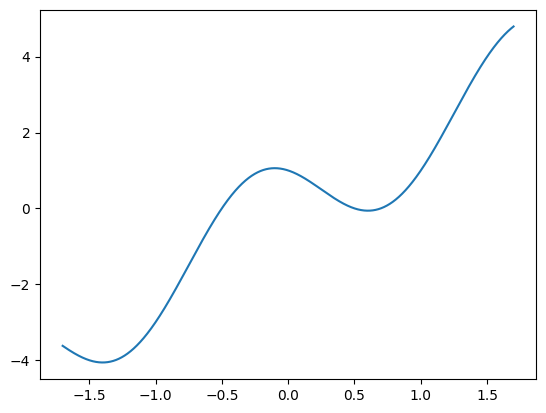

In [2]:
import numpy as np
import math

def f(x):
    return 2*x + math.cos(math.pi*x) - math.sin(math.pi*x)

x = np.arange(-1.7, 1.7, 0.001)
def create_func_points(x, F):
    func = []
    for i in x:
        func.append(F(i))
    return func

import matplotlib.pyplot as plt

f_points = create_func_points(x, f)
plt.plot(x, f_points)

In [3]:
def lipschitz_constant(a, b, n=1000):
    # Генерация равномерно распределенных точек на отрезке [a, b]
    x_values = np.linspace(a, b, n)

    # Вычисление производной в каждой точке
    derivatives = np.zeros_like(x_values)
    for i, x in enumerate(x_values):
        # Аппроксимация производной с использованием малого приращения
        dx = 1e-8
        derivative = (f(x + dx) - f(x - dx)) / (2 * dx)
        derivatives[i] = np.abs(derivative)

    # Максимальное значение производной как оценка константы Липшица
    lipschitz = np.max(derivatives)

    return lipschitz

In [4]:
lipschitz_constant(-1.7, 1.7, n=1000)

6.442878530688034

In [5]:
import math

#точка пересечения графиков функций
def get_point_intersection(Lx, Rx, L):
    return (f(Lx) - f(Rx)) / (2 * L) + (Lx + Rx) / 2

def bl(x, Lx, Rx, L):
        return max(f(Lx) - L*abs(x - Lx), f(Rx) - L*abs(x - Rx))

Lx_data = []
Rx_data = []
Inter_data = []

def piyavskii(a, b, N, eps):
    Lx = a
    Rx = b

    L = lipschitz_constant(a, b)
    plt.plot(x, f_points)

    for i in range(N):
        PIx = get_point_intersection(Lx, Rx, L)
        x1 = np.arange(Lx, Rx, 0.001)
        bl_points = []
        for j in x1:
            bl_points.append(bl(j, Lx, Rx, L))
        plt.plot(x1, bl_points)
        PILx = get_point_intersection(Lx, PIx, L)
        PIRx = get_point_intersection(PIx, Rx, L)

        x3 = np.arange(Lx, Rx, 0.001)
        bl_points = []
        for k in x3:
            bl_points.append(bl(k, Lx, Rx, L))
        plt.plot(x3, bl_points)

        if f(PILx) <= f(PIRx):
            Rx = PIx
        else:
            Lx = PIx

        opt_point = get_point_intersection(Lx, Rx, L)
        Inter_data.append(opt_point)

        x2 = np.arange(Lx, Rx, 0.001)
        bl_points = []
        for k in x2:
            bl_points.append(bl(k, Lx, Rx, L))
        plt.plot(x2, bl_points)

        if abs(bl(opt_point, Lx, Rx, L) - f(opt_point)) < eps:
            print(f'Сходимость за: {i} итераций')
            break

    print(f'Оптимальное значение x: {opt_point}')
    print(f'Оптимальное значение функции: {f(opt_point)}')

Сходимость за: 11 итераций
Оптимальное значение x: -1.3987294598887987
Оптимальное значение функции: -4.0600850990253115


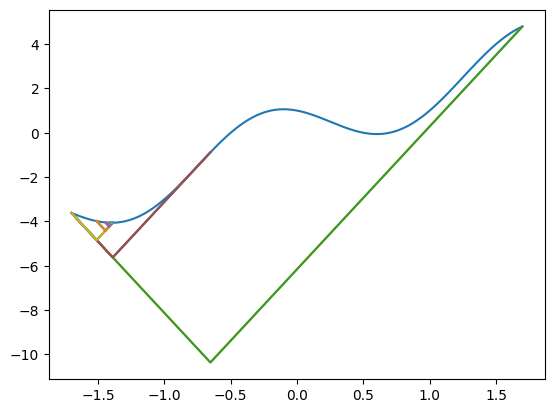

In [6]:
piyavskii(-1.7, 1.7, 100, 0.001)